### Investigation - Attempt 1

Looking for nice statistical patterns or distributions of data, using raw data from the CSO. 

This is just a rough investigation, as I have not finalized my intentions for this project.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Investigating SEC Data

#### Leaving Cert Ordinary Level Maths

I took some summary statistics from the State Examinations Commission and put that data into a CSV file. This file contains the 2018 Leaving Cert Higher, Ordinary and Foundation Level results by gender, in Maths and English. I initially compared results in different subjects by gender, before settling on Leaving Cert Ordinary Level Maths. 

I am very familiar with the Leaving Cert Maths course and the factors influencing students attainment. I plan to investigate these factors, and simulate data to determine if my experiences and current research can be modelled effectively.

In [182]:
#Read SEC Data
df = pd.read_csv('data/2018lc-math-english.csv')
#Select Rows 8 to 15 and Columns 0 to 5
y = df.loc[8:15]

y = y.iloc[:, 0:5]
#Get rid of the existing index and replace with 1 to 9
#Now the index will match grade categories 
y = y.reset_index(drop = True)
y = y.set_index(np.arange(1, 9))
#Show df table
y

,Grade,Level,2018-total-maths,2018-female-maths,2018-male-maths
1,1,O,482,314,168
2,2,O,3392,1979,1413
3,3,O,6484,3524,2960
4,4,O,7551,3981,3570
5,5,O,6348,3260,3088
6,6,O,4062,1948,2114
7,7,O,1870,868,1002
8,8,O,1147,436,711


In [164]:
# Creating df for female and male students, and grades
fem_mat = pd.DataFrame(y.loc[:,'2018-female-maths'])
mal_mat = pd.DataFrame(y.loc[:,'2018-male-maths'])
grade = np.array(y.loc[:, 'Grade'])

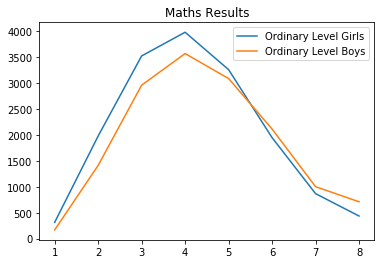

In [165]:
plt.title('Maths Results')
plt.plot(grade, fem_mat, label = 'Ordinary Level Girls')
plt.plot(grade, mal_mat, label = 'Ordinary Level Boys')
plt.legend()
plt.show()

In [166]:
# How many girls sat LCOL in 2018
totalgirl = np.sum(fem_mat)
totalgirl

2018-female-maths    16310
dtype: int64

In [167]:
# How many boys sat LCOL in 2018
totalboy = np.sum(mal_mat)
totalboy

2018-male-maths    15026
dtype: int64

In [173]:
# Total number of LCOL candidates
bestpupil = y.loc[:, '2018-total-maths']
sum_total = np.sum(bestpupil)
sum_total

31336

In [174]:
# Percentage of students achieving each grade
# Note (8 - 15) corresponds to grades (1-8)
print(bestpupil/sum_total*100)

1     1.538167
2    10.824611
3    20.691856
4    24.096885
5    20.257850
6    12.962727
7     5.967577
8     3.660327
Name: 2018-total-maths, dtype: float64


In [175]:
print('Percentage of Students Awarded an O4 or higher grade: ',1.538167+10.824611+20.691856+24.096885)

Percentage of Students Awarded an O4 or higher grade:  57.151519


In [184]:
# Set x to be in the range 0 - 8
x = np.arange(0, 8)

In [177]:
bestgirl = (fem_mat.iloc[x])
print(bestgirl/totalgirl*100)

   2018-female-maths
1           1.925199
2          12.133660
3          21.606376
4          24.408338
5          19.987738
6          11.943593
7           5.321888
8           2.673207


In [178]:
print('Percentage of Female Students Awarded an O4 or higher grade: ', 1.925199+12.133660+21.606376+24.408338)

Percentage of Female Students Awarded an O4 or higher grade:  60.073573


In [179]:
bestboy = (mal_mat.iloc[x])
print(bestboy/totalboy*100)

   2018-male-maths
1         1.118062
2         9.403700
3        19.699188
4        23.758818
5        20.551045
6        14.068947
7         6.668441
8         4.731798


In [180]:
print('Percentage of Students Awarded an O4 or higher grade: ', 1.118062+9.403700+19.699188+23.758818)

Percentage of Students Awarded an O4 or higher grade:  53.97976800000001


As the data I have here, is ordinal and categorical, I can't calculate the mean. From my percentages above, and the fact my data is ordered by descending grade awards, I can see that the median grade for both female and male is an O4.

In this year approximately 57% of students were awarded an O4 or higher grade. 60% of female students received 04 or higher grades, and 54% of male students. 

## Simulating Data

From my experience working in the education sector, I know that assessment grades are often normally distributed. 

If I assume that the set of Leaving Cert Results are normally distributed, then I would expect my mean, median and mode to have very similar values. In a perfect normal distribution they would be the same, but that would be unlikely to be the case here. So I can use the median O4 grade, observed in my investigation, to make inferences about a possible mean, and use this to generate normally distributed data.

In [74]:
# Generate random female results with mean in the high O4 interval
sim_girls = np.round(np.random.normal(400, 90, 100), decimals = 0)
sim_girls = np.clip(sim_girls, 0, 600)

#Generate random male results with mean in the low O4 interval
sim_boys = np.round(np.random.normal(360, 90, 100), decimals = 0)
sim_boys = np.clip(sim_boys, 0, 600)


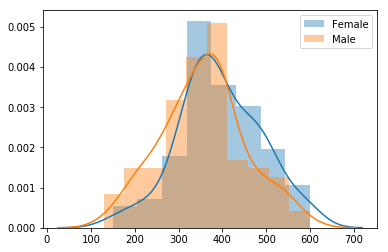

In [75]:
#Graphically display data to look for errors
#Such as results over 600 or under 0
# No fails etc.
sns.distplot(sim_girls, label = 'Female');
sns.distplot(sim_boys, label = 'Male');
plt.legend();


In [76]:
#Adding simulated data to data frame(female)
df = pd.DataFrame(sim_girls, columns=['Result'])
#Adding simulated data to df(male)
df2 = pd.DataFrame(sim_boys, columns=['Result'])
#Combining both datasets in same column of the same df
#Note this df has only one col, Result
df = df.append(df2, ignore_index=True)

In [77]:
#Cutting and assigning label to existing df col, Result
c = pd.cut(
    df.stack(), [0, 180, 240, 300, 360,  420, 480, 540, 600], 
    labels=['08', 'O7', 'O6', 'O5', 'O4', 'O3', 'O2', 'O1'])
#Create df, df2, with two cols, Result and Result_grade
df2 = pd.DataFrame(df.join(c.unstack().add_suffix('_grade')))

#Taking the Result_grade column only, name it df2
df2 = pd.Series.to_frame(df2.loc[:, 'Result_grade'])
#Reference:https://stackoverflow.com/questions/44659040/pandas-assign-category-based-on-where-value-falls-in-range

In [78]:
# Generating dfs with 100 repeated strings, first female, then male
string_female = pd.DataFrame(['female']*100)
string_male = pd.DataFrame(['male']*100)
# Combining both dfs to the same df column, named gender
gender = string_female.append(string_male, ignore_index=True)

In [79]:
# Adding gender col to existing df
df['Gender'] = gender

In [80]:
df

,Result,Gender
0,302.0,female
1,332.0,female
2,303.0,female
3,291.0,female
4,350.0,female
5,234.0,female
6,336.0,female
7,311.0,female
8,295.0,female
9,405.0,female


In [81]:
# df has cols Result and Gender
# Next at col Result_grade, contained in df2
df = df.join(df2)
df

,Result,Gender,Result_grade
0,302.0,female,O5
1,332.0,female,O5
2,303.0,female,O5
3,291.0,female,O6
4,350.0,female,O5
5,234.0,female,O7
6,336.0,female,O5
7,311.0,female,O5
8,295.0,female,O6
9,405.0,female,O4


In [82]:
sum_cats = df["Result_grade"].value_counts()
perc = sum_cats/200*100
perc

O4    27.5
O5    24.5
O3    12.5
O6    11.5
O2     9.5
O7     6.0
O1     5.5
08     3.0
Name: Result_grade, dtype: float64

In [83]:
# Taking girls in simulated data, count each grade
girls = df.loc[0:99]
sum_girls = girls["Result_grade"].value_counts()
# As I have 100 data points, my sum is equal to my percentage
sum_girls

O5    27
O4    26
O3    17
O2    12
O1     6
O6     6
O7     4
08     2
Name: Result_grade, dtype: int64

In [84]:
# Taking boys in simulated data, count each grade
boys = df.loc[100:199]
sum_boys = boys["Result_grade"].value_counts()
# As I have 100 data points, my sum is equal to my percentage
sum_boys

O4    29
O5    22
O6    17
O3     8
O7     8
O2     7
O1     5
08     4
Name: Result_grade, dtype: int64

#### Evaluation

- I initially simulated my female data with a mean of 340 and standard deviation of 100. My male data was simulated with a mean of 315 and the same standard deviation. I ran this simulation several times, and found that my total results showed higher rates of failure and smaller numbers of students achieving the top grades of O1 and O2. Looking at male and female candidates separately I found that both data sets had similar discrepancies. 
- Attempts to adjust this with a higher mean, lead to too many students getting the highest grade O1, while the other grades were more in line with my research.

## References

* [State Examinations Commission - Annual Exams Statistics](https://www.examinations.ie/statistics/?l=en&mc=st&sc=r11)